In [13]:
import torch
from torch import nn
from torch.profiler import profiler
from torch.utils.benchmark import Timer, Compare
import torch_fftconv
import matplotlib.pyplot as plt

# Varying input size

[---------------------- Conv2d ---------------------]
                       |  naive conv2d  |  fft conv2d
4 threads: ------------------------------------------
      input size: 64   |        8.6     |      4.9   
      input size: 128  |       77.8     |     33.9   
      input size: 256  |      395.0     |    186.0   
      input size: 512  |     1739.3     |    557.9   

Times are in milliseconds (ms).



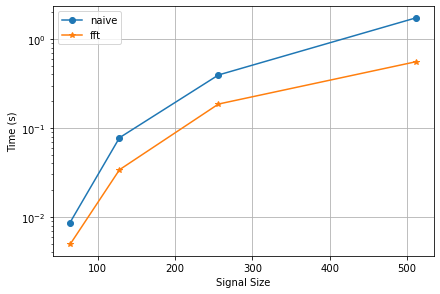

In [14]:
batch = 64
in_channels = 1
out_channels = 1
groups = 1
input_size = [64, 128, 256, 512]
kernel_size = 31
stride = 1
dilation = 1

model1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, dilation=dilation, groups=groups, bias=False)
model2 = torch_fftconv.FFTConv2d(in_channels, out_channels, kernel_size, stride=stride, dilation=dilation, groups=groups, bias=False)

results = []
for i_size in input_size:
    label = 'Conv2d'
    sub_label = f'input size: {i_size}'
    x = torch.ones(batch, in_channels, i_size, i_size)

    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model1},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='naive conv2d',
    ).blocked_autorange(min_run_time=1))
    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model2},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='fft conv2d',
    ).blocked_autorange(min_run_time=1))

compare = Compare(results)
compare.print()

naive_result = [x.median for x in results[::2]]
fft_result = [x.median for x in results[1::2]]

plt.plot(input_size, naive_result, marker='o', label='naive')
plt.plot(input_size, fft_result, marker='*', label='fft')
plt.tight_layout()
plt.yscale('log')
plt.legend()
plt.xlabel('Signal Size')
plt.ylabel('Time (s)')
plt.grid()
plt.show()

# Varying kernel size

[---------------------- Conv2d ----------------------]
                        |  naive conv2d  |  fft conv2d
4 threads: -------------------------------------------
      kernel size: 15   |      162.1     |    194.9   
      kernel size: 31   |      395.9     |    184.6   
      kernel size: 63   |     1117.5     |    176.4   
      kernel size: 127  |     4727.9     |    167.8   

Times are in milliseconds (ms).



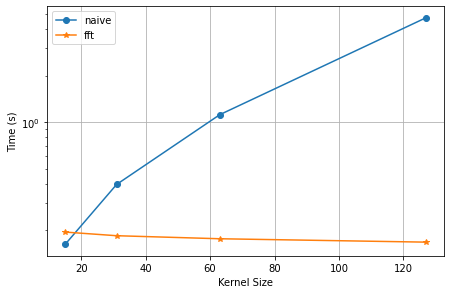

In [15]:
batch = 64
in_channels = 1
out_channels = 1
groups = 1
input_size = 256
kernel_size = [15, 31, 63, 127]
stride = 1
dilation = 1

x = torch.ones(batch, in_channels, input_size, input_size)

results = []
for k_size in kernel_size:
    label = 'Conv2d'
    sub_label = f'kernel size: {k_size}'

    model1 = nn.Conv2d(in_channels, out_channels, k_size, stride=stride, dilation=dilation, groups=groups, bias=False)
    model2 = torch_fftconv.FFTConv2d(in_channels, out_channels, k_size, stride=stride, dilation=dilation, groups=groups, bias=False)

    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model1},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='naive conv2d',
    ).blocked_autorange(min_run_time=1))
    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model2},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='fft conv2d',
    ).blocked_autorange(min_run_time=1))

compare = Compare(results)
compare.print()

naive_result = [x.median for x in results[::2]]
fft_result = [x.median for x in results[1::2]]

plt.plot(kernel_size, naive_result, marker='o', label='naive')
plt.plot(kernel_size, fft_result, marker='*', label='fft')
plt.tight_layout()
plt.yscale('log')
plt.legend()
plt.xlabel('Kernel Size')
plt.ylabel('Time (s)')
plt.grid()
plt.show()

# Varying channel size

[---------------------- Conv2d ----------------------]
                        |  naive conv2d  |  fft conv2d
4 threads: -------------------------------------------
      channel size: 1   |        8.2     |       1.8  
      channel size: 4   |       33.0     |      17.9  
      channel size: 16  |      585.5     |     507.6  
      channel size: 32  |     2240.7     |    1585.6  

Times are in milliseconds (ms).



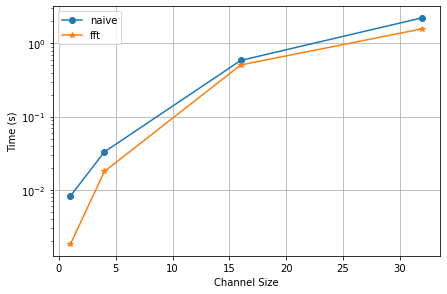

In [16]:
batch = 8
channels = [1, 4, 16, 32]
groups = 1
input_size = 128
kernel_size = 31
stride = 1
dilation = 1


results = []
for chs in channels:
    label = 'Conv2d'
    sub_label = f'channel size: {chs}'
    
    x = torch.ones(batch, chs, input_size, input_size)
    model1 = nn.Conv2d(chs, chs, kernel_size, stride=stride, dilation=dilation, groups=groups, bias=False)
    model2 = torch_fftconv.FFTConv2d(chs, chs, kernel_size, stride=stride, dilation=dilation, groups=groups, bias=False)

    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model1},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='naive conv2d',
    ).blocked_autorange(min_run_time=1))
    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model2},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='fft conv2d',
    ).blocked_autorange(min_run_time=1))

compare = Compare(results)
compare.print()

naive_result = [x.median for x in results[::2]]
fft_result = [x.median for x in results[1::2]]

plt.plot(channels, naive_result, marker='o', label='naive')
plt.plot(channels, fft_result, marker='*', label='fft')
plt.tight_layout()
plt.yscale('log')
plt.legend()
plt.xlabel('Channel Size')
plt.ylabel('Time (s)')
plt.grid()
plt.show()

# Varying groups

[------------------- Conv2d ------------------]
                 |  naive conv2d  |  fft conv2d
4 threads: ------------------------------------
      groups: 1  |     2268.8     |    1584.3  
      groups: 2  |     1143.3     |     800.5  
      groups: 4  |      490.7     |     415.2  
      groups: 8  |      514.0     |     283.9  

Times are in milliseconds (ms).



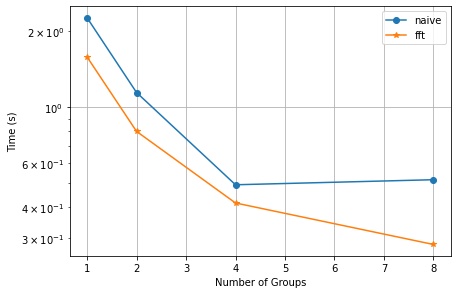

In [17]:
batch = 8
channels = 32
groups = [1, 2, 4, 8]
input_size = 128
kernel_size = 31
stride = 1
dilation = 1

x = torch.ones(batch, channels, input_size, input_size)

results = []
for g in groups:
    label = 'Conv2d'
    sub_label = f'groups: {g}'
    
    model1 = nn.Conv2d(channels, channels, kernel_size, stride=stride, dilation=dilation, groups=g, bias=False)
    model2 = torch_fftconv.FFTConv2d(channels, channels, kernel_size, stride=stride, dilation=dilation, groups=g, bias=False)

    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model1},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='naive conv2d',
    ).blocked_autorange(min_run_time=1))
    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model2},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='fft conv2d',
    ).blocked_autorange(min_run_time=1))

compare = Compare(results)
compare.print()

naive_result = [x.median for x in results[::2]]
fft_result = [x.median for x in results[1::2]]

plt.plot(groups, naive_result, marker='o', label='naive')
plt.plot(groups, fft_result, marker='*', label='fft')
plt.tight_layout()
plt.yscale('log')
plt.legend()
plt.xlabel('Number of Groups')
plt.ylabel('Time (s)')
plt.grid()
plt.show()

# Varying stride

[------------------- Conv2d ------------------]
                 |  naive conv2d  |  fft conv2d
4 threads: ------------------------------------
      stride: 1  |     1742.3     |    526.1   
      stride: 2  |      439.0     |    646.1   
      stride: 3  |      198.2     |    632.5   
      stride: 5  |       79.6     |    519.1   
      stride: 7  |       46.4     |    531.9   

Times are in milliseconds (ms).



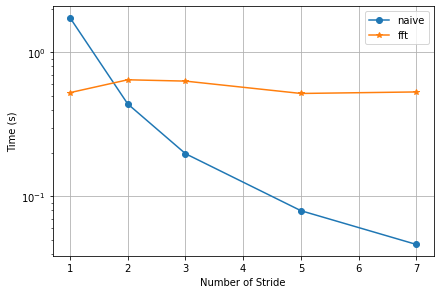

In [18]:
batch = 64
channels = 1
groups = 1
input_size = 512
kernel_size = 31
stride = [1, 2, 3, 5, 7]
dilation = 1

x = torch.ones(batch, channels, input_size, input_size)

results = []
for s in stride:
    label = 'Conv2d'
    sub_label = f'stride: {s}'
    
    model1 = nn.Conv2d(channels, channels, kernel_size, stride=s, dilation=dilation, groups=groups, bias=False)
    model2 = torch_fftconv.FFTConv2d(channels, channels, kernel_size, stride=s, dilation=dilation, groups=groups, bias=False)

    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model1},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='naive conv2d',
    ).blocked_autorange(min_run_time=1))
    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model2},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='fft conv2d',
    ).blocked_autorange(min_run_time=1))

compare = Compare(results)
compare.print()

naive_result = [x.median for x in results[::2]]
fft_result = [x.median for x in results[1::2]]

plt.plot(stride, naive_result, marker='o', label='naive')
plt.plot(stride, fft_result, marker='*', label='fft')
plt.tight_layout()
plt.yscale('log')
plt.legend()
plt.xlabel('Number of Stride')
plt.ylabel('Time (s)')
plt.grid()
plt.show()

# Varying dilation

[-------------------- Conv2d -------------------]
                   |  naive conv2d  |  fft conv2d
4 threads: --------------------------------------
      dilation: 1  |     1735.6     |    548.8   
      dilation: 2  |     1573.7     |    536.4   
      dilation: 3  |     1368.5     |    626.1   
      dilation: 5  |     1001.8     |    586.5   
      dilation: 7  |      699.3     |    648.8   

Times are in milliseconds (ms).



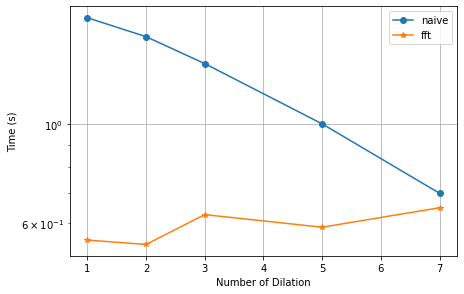

In [19]:
batch = 64
channels = 1
groups = 1
input_size = 512
kernel_size = 31
stride = 1
dilation = [1, 2, 3, 5, 7]

x = torch.ones(batch, channels, input_size, input_size)

results = []
for d in dilation:
    label = 'Conv2d'
    sub_label = f'dilation: {d}'
    
    model1 = nn.Conv2d(channels, channels, kernel_size, stride=stride, dilation=d, groups=groups, bias=False)
    model2 = torch_fftconv.FFTConv2d(channels, channels, kernel_size, stride=stride, dilation=d, groups=groups, bias=False)

    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model1},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='naive conv2d',
    ).blocked_autorange(min_run_time=1))
    results.append(Timer(
        stmt='m(x)',
        setup='',
        globals={'x': x, 'm': model2},
        num_threads=4,
        label=label,
        sub_label=sub_label,
        description='fft conv2d',
    ).blocked_autorange(min_run_time=1))

compare = Compare(results)
compare.print()

naive_result = [x.median for x in results[::2]]
fft_result = [x.median for x in results[1::2]]

plt.plot(dilation, naive_result, marker='o', label='naive')
plt.plot(dilation, fft_result, marker='*', label='fft')
plt.tight_layout()
plt.yscale('log')
plt.legend()
plt.xlabel('Number of Dilation')
plt.ylabel('Time (s)')
plt.grid()
plt.show()